## Week 8
## DSC 630
## Abed Tabbalat

In [182]:
# Base library import
import pandas as pd
import numpy as np
from numpy import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2, mean_squared_error as mse
from datetime import datetime

# Warning Skip
import warnings
warnings.filterwarnings("ignore")

In [183]:
# Settings
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [184]:
# Loading dataset
df = pd.read_csv('us_retail_sales.csv')
df

,YEAR,JAN,FEB,MAR,APR,...,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,...,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,...,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,...,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,...,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,...,196218.0,198859.0,200509.0,200174.0,201284.0
...,...,...,...,...,...,...,...,...,...,...,...
25,2017,416081,415503,414620,416889,...,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,...,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,...,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,...,483716.0,493327.0,493991.0,488652.0,484782.0


In [185]:
# Data type
pd.set_option('display.max_rows', None)
df.dtypes

YEAR      int64
JAN       int64
FEB       int64
MAR       int64
APR       int64
MAY       int64
JUN       int64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [186]:
# Data Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,30.0,2006.500000,8.803408,1992.0,1999.25,2006.5,2013.75,2021.0
JAN,30.0,304803.833333,97687.399232,146925.0,228856.75,303486.0,371527.00,520162.0
FEB,30.0,305200.900000,96682.043053,147223.0,231470.75,304592.5,377008.50,504458.0
MAR,30.0,307533.566667,100002.422696,146805.0,233019.00,308655.5,379221.00,559871.0
APR,30.0,306719.600000,98207.161171,148032.0,233235.50,311233.5,376797.50,562269.0
MAY,30.0,309205.633333,99541.010078,149010.0,234976.50,308690.0,382698.25,548987.0
JUN,30.0,311406.966667,101057.212178,149800.0,235967.25,312957.0,383839.75,550782.0
JUL,29.0,304375.448276,92471.103673,150761.0,233948.00,313520.0,373554.00,481627.0
AUG,29.0,305451.965517,92504.808195,151067.0,236566.00,310046.0,372489.00,483716.0
SEP,29.0,306078.206897,93008.417392,152588.0,237481.00,310673.0,372505.00,493327.0


### Data Wrangling

In [187]:
pd.set_option('display.max_rows', 10)
# Transposing data to have the date in rows
df2 = pd.melt(df, id_vars=['YEAR'], var_name="MONTH_NAME", value_name="SALES")
df2['MONTH'] = df2['MONTH_NAME'].map({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12})
df2['DAY'] = 1
df2['DATE'] = pd.to_datetime(df2[['YEAR', 'MONTH', 'DAY']])
df2

,YEAR,MONTH_NAME,SALES,MONTH,DAY,DATE
0,1992,JAN,146925.0,1,1,1992-01-01
1,1993,JAN,157555.0,1,1,1993-01-01
2,1994,JAN,167518.0,1,1,1994-01-01
3,1995,JAN,182413.0,1,1,1995-01-01
4,1996,JAN,189135.0,1,1,1996-01-01
...,...,...,...,...,...,...
355,2017,DEC,433282.0,12,1,2017-12-01
356,2018,DEC,434803.0,12,1,2018-12-01
357,2019,DEC,458055.0,12,1,2019-12-01
358,2020,DEC,484782.0,12,1,2020-12-01


In [188]:
# NaN Check
df2.isna().sum()

YEAR          0
MONTH_NAME    0
SALES         6
MONTH         0
DAY           0
DATE          0
dtype: int64

In [189]:
# Final dateset to obtain DATE index and SALES columns for model. Dropping 6 NaNs from dataset.
df3 = df2.sort_values('DATE')
df3 = df3.dropna()
df3.isna().sum()

YEAR          0
MONTH_NAME    0
SALES         0
MONTH         0
DAY           0
DATE          0
dtype: int64

### Plot the data with proper labeling and make some observations on the graph.

Text(0.5, 1.0, 'Retail Sales By Month')

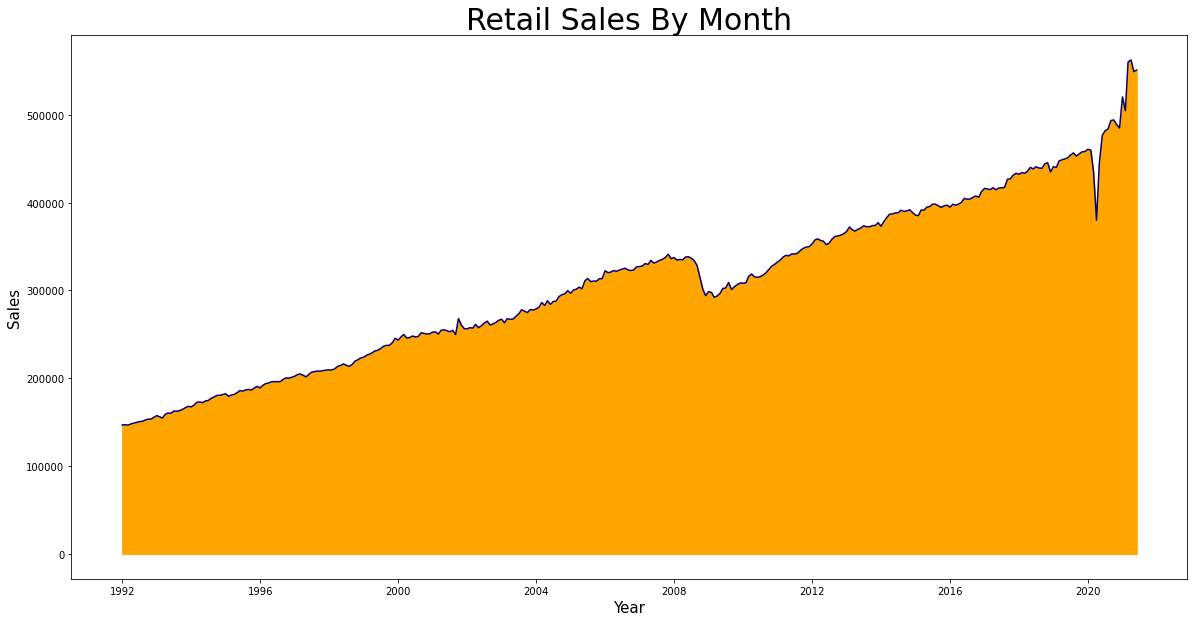

In [190]:
# Plotting line graph
X = df3['DATE']
y = df3['SALES']

plt.figure(figsize=(20,10))
plt.fill_between(X, y, color='orange')
sns.lineplot(X, y, color='navy')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('Retail Sales By Month', fontsize=30)

**Chart shows a steady trend from 1992 until 2008 when the recession occured when it starts decreasing. Also, 2020 when the pandemic started we can see the clear dip on the chart.**

### Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [191]:
# Splitting the data
# Step one have the parameters into 2 different buckets
train = df3[df3['DATE'] < '2020-07-01']
test = df3[df3['DATE'] >= '2020-07-01']
train, test

(     YEAR MONTH_NAME     SALES  MONTH  DAY       DATE
 0    1992        JAN  146925.0      1    1 1992-01-01
 30   1992        FEB  147223.0      2    1 1992-02-01
 60   1992        MAR  146805.0      3    1 1992-03-01
 90   1992        APR  148032.0      4    1 1992-04-01
 120  1992        MAY  149010.0      5    1 1992-05-01
 ..    ...        ...       ...    ...  ...        ...
 58   2020        FEB  459610.0      2    1 2020-02-01
 88   2020        MAR  434281.0      3    1 2020-03-01
 118  2020        APR  379892.0      4    1 2020-04-01
 148  2020        MAY  444631.0      5    1 2020-05-01
 178  2020        JUN  476343.0      6    1 2020-06-01
 
 [342 rows x 6 columns],
      YEAR MONTH_NAME     SALES  MONTH  DAY       DATE
 208  2020        JUL  481627.0      7    1 2020-07-01
 238  2020        AUG  483716.0      8    1 2020-08-01
 268  2020        SEP  493327.0      9    1 2020-09-01
 298  2020        OCT  493991.0     10    1 2020-10-01
 328  2020        NOV  488652.0     11

In [192]:
# Step 2 splitting columns
X_train = train.drop(['SALES', 'MONTH_NAME'], axis=1)
y_train = train['SALES']

X_test = test.drop(['SALES', 'MONTH_NAME'], axis=1)
y_test = test['SALES']

X_train['DATE'] = X_train['DATE'].map(datetime.toordinal)
X_test['DATE'] = X_test['DATE'].map(datetime.toordinal)

X_train, y_train, X_test, y_test

(     YEAR  MONTH  DAY    DATE
 0    1992      1    1  727198
 30   1992      2    1  727229
 60   1992      3    1  727258
 90   1992      4    1  727289
 120  1992      5    1  727319
 ..    ...    ...  ...     ...
 58   2020      2    1  737456
 88   2020      3    1  737485
 118  2020      4    1  737516
 148  2020      5    1  737546
 178  2020      6    1  737577
 
 [342 rows x 4 columns],
 0      146925.0
 30     147223.0
 60     146805.0
 90     148032.0
 120    149010.0
          ...   
 58     459610.0
 88     434281.0
 118    379892.0
 148    444631.0
 178    476343.0
 Name: SALES, Length: 342, dtype: float64,
      YEAR  MONTH  DAY    DATE
 208  2020      7    1  737607
 238  2020      8    1  737638
 268  2020      9    1  737669
 298  2020     10    1  737699
 328  2020     11    1  737730
 ..    ...    ...  ...     ...
 59   2021      2    1  737822
 89   2021      3    1  737850
 119  2021      4    1  737881
 149  2021      5    1  737911
 179  2021      6    1  737942

### Use the training set to build a predictive model for the monthly retail sales.

In [193]:
# Applying Linear Regression to the data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Use the model to predict the monthly retail sales on the last year of data.

In [194]:
# Predicting the test data.
pred = lr.predict(X_test)
pred

array([449750.97699619, 450150.25451637, 450549.53203655, 451938.03141761,
       452337.30893779, 453725.80831874, 453129.40029633, 453528.67781651,
       456895.62091899, 457294.89843917, 458683.39782012, 459082.6753403 ])

### Report the RMSE of the model predictions on the test set.

In [206]:
r2_train = r2(y_test, pred) # calculating R2
rmse_train = sqrt(mse(y_test, pred)) # calculating RMSE
mae_train = mae(y_test, pred) # calculating MAE

print(f'\nTraining data R2, RMSE, MAE')
print(f'{len("Training data R2, RMSE, MAE") * "-"}')
print(f'R2: {r2_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')


Training data R2, RMSE, MAE
---------------------------
R2: -3.6641114804303276
RMSE: 66644.89887908586
MAE: 60463.1180954439


In [170]:
test1 = test
test1['PRED_SALES'] = pred
test1

,YEAR,MONTH_NAME,SALES,MONTH,DAY,DATE,PRED_SALES
208,2020,JUL,481627.0,7,1,2020-07-01,449750.976996
238,2020,AUG,483716.0,8,1,2020-08-01,450150.254516
268,2020,SEP,493327.0,9,1,2020-09-01,450549.532037
298,2020,OCT,493991.0,10,1,2020-10-01,451938.031418
328,2020,NOV,488652.0,11,1,2020-11-01,452337.308938
...,...,...,...,...,...,...,...
59,2021,FEB,504458.0,2,1,2021-02-01,453528.677817
89,2021,MAR,559871.0,3,1,2021-03-01,456895.620919
119,2021,APR,562269.0,4,1,2021-04-01,457294.898439
149,2021,MAY,548987.0,5,1,2021-05-01,458683.397820


Text(0.5, 1.0, 'Retail Sales Prediction vs Actual')

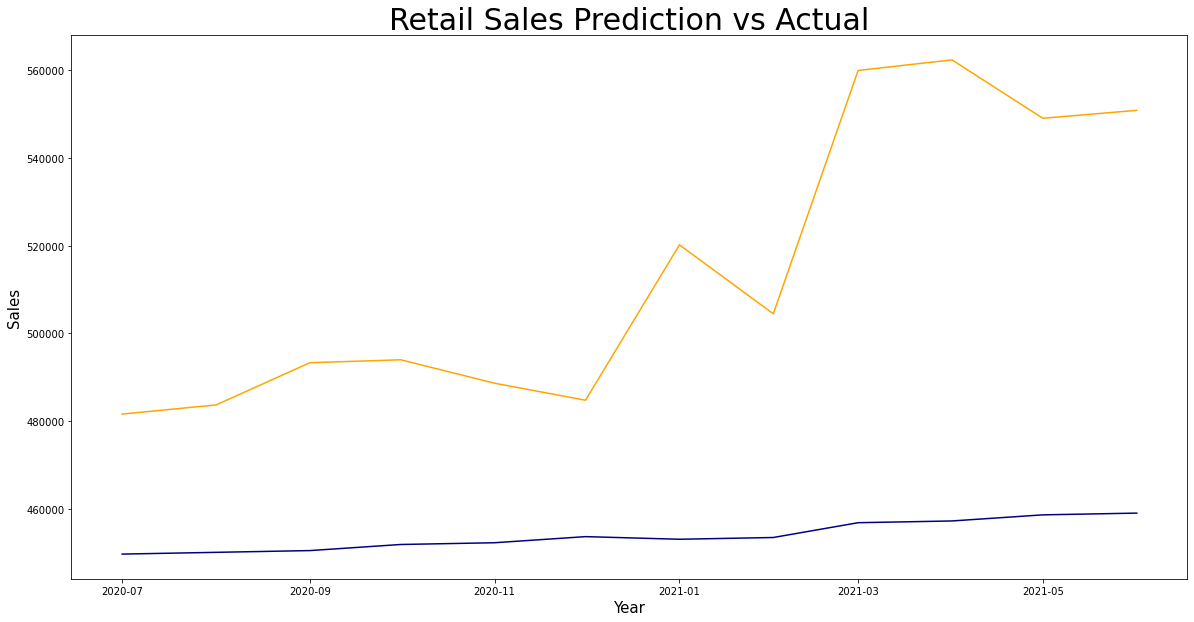

In [171]:
# Comparing results with a line plot
X1 = test1['DATE']
Y1 = test1['SALES']
Y2 = test1['PRED_SALES']

# Plotting line graph
plt.figure(figsize=(20,10))
sns.lineplot(X1, Y1, color='orange')
sns.lineplot(X1, Y2, color='navy')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('Retail Sales Prediction vs Actual', fontsize=30)